In [1]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y=pd.read_csv(r'C:\Local\ALY6040_Data Mining\Week 5\Reviews.csv')

Rid Of Very Unhelpful Reviews & Narrow It To First 5000 Due To Data Size

In [2]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 15000)]

Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loop to strip out nouns

In [4]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [5]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))
data_nouns

                                                    Text
0      Vitality food products quality product stew me...
2      confection centuries citrus gelatin nuts case ...
4      Great taffy price assortment yummy taffy Deliv...
5      hair taffy pound bag taffy flavors watermelon ...
6      saltwater taffy flavors candy None candies ver...
...                                                  ...
14994  product dishes rice mix daughter receipe recip...
14995  Rice Select Whole Wheat Orzo grocery store Ama...
14996  QFC grocery store place Amazon price package. ...
14997  Hard wheat orzo supermarket Amazon Tasty soup ...
14998       product orzo packaging jar storage measuring

[12734 rows x 1 columns]

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Add Stop Words to remove words that aren't useful to analysis but common

In [7]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
#stop_words = Text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = set(stopwords.words('english')).union(add_stop_words)

Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [8]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index

In [9]:
from gensim import matutils
import scipy.sparse
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())
id2wordn

{13979: 'vitality',
 5329: 'food',
 10293: 'products',
 10501: 'quality',
 10289: 'product',
 12480: 'stew',
 8181: 'meat',
 7405: 'labrador',
 3167: 'confection',
 2472: 'centuries',
 2814: 'citrus',
 5637: 'gelatin',
 9064: 'nuts',
 2368: 'case',
 5104: 'filberts',
 12345: 'squares',
 12680: 'sugar',
 8672: 'mouthful',
 6334: 'heaven',
 13490: 'treat',
 12543: 'story',
 7582: 'lewis',
 7656: 'lion',
 14345: 'witch',
 14083: 'wardrobe',
 4497: 'edmund',
 1946: 'brother',
 11880: 'sisters',
 5972: 'great',
 12882: 'taffy',
 10222: 'price',
 730: 'assortment',
 14568: 'yummy',
 3863: 'delivery',
 7796: 'lover',
 3762: 'deal',
 6150: 'hair',
 10121: 'pound',
 1179: 'bag',
 5222: 'flavors',
 14124: 'watermelon',
 11150: 'root',
 1382: 'beer',
 8240: 'melon',
 9693: 'peppermint',
 5945: 'grape',
 3111: 'complaint',
 1558: 'bit',
 10744: 'red',
 1574: 'black',
 9835: 'pieces',
 5000: 'favorites',
 7271: 'kids',
 6610: 'husband',
 14176: 'weeks',
 1824: 'brand',
 11310: 'saltwater',
 2221: '

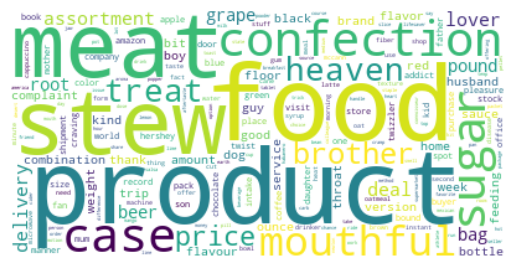

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all the words in the corpus
all_words = ' '.join(id2wordn.values())

# Generate word cloud
wordcloud = WordCloud(background_color='white').generate(all_words)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

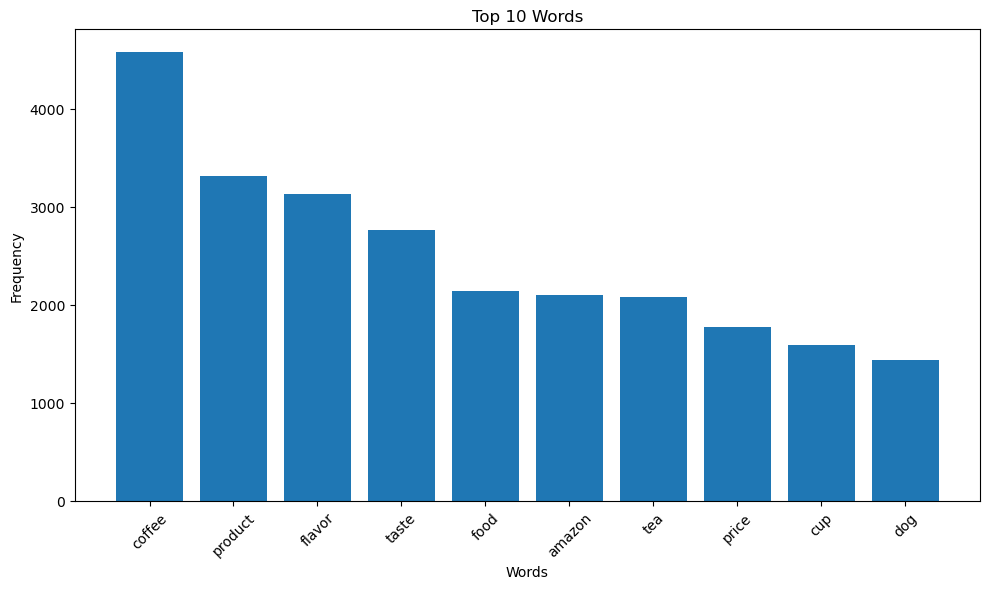

In [13]:
import matplotlib.pyplot as plt

# Calculate the sum of word occurrences across all documents
word_counts = data_dtmn.sum()

# Sort the words based on their frequencies
sorted_words = word_counts.sort_values(ascending=False)

# Set the number of words to display in the bar chart
top_n = 10

# Select the top n words and their frequencies
top_words = sorted_words[:top_n]
top_word_counts = top_words.values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_word_counts, tick_label=top_words.index)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Words'.format(top_n))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Get ready to build model

In [15]:
from gensim import models
import scipy.sparse

In [16]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.019*"tea" + 0.017*"taste" + 0.017*"flavor" + 0.012*"product" + 0.012*"crackers" + 0.010*"sugar" + 0.009*"mix" + 0.008*"water" + 0.008*"chocolate" + 0.007*"amazon"'),
 (1,
  '0.080*"coffee" + 0.027*"cup" + 0.019*"flavor" + 0.015*"cups" + 0.013*"taste" + 0.012*"amazon" + 0.011*"product" + 0.009*"price" + 0.009*"chocolate" + 0.008*"keurig"'),
 (2,
  '0.028*"treats" + 0.028*"dog" + 0.026*"food" + 0.018*"dogs" + 0.015*"product" + 0.015*"treat" + 0.011*"cookies" + 0.009*"bag" + 0.008*"price" + 0.008*"amazon"')]

In [1]:
import pandas as pd

# Example topic results
results = [(0, '0.019*"tea" + 0.017*"taste" + 0.017*"flavor" + 0.012*"product" + 0.012*"crackers" + 0.010*"sugar" + 0.009*"mix" + 0.008*"water" + 0.008*"chocolate" + 0.007*"amazon"'),
           (1, '0.080*"coffee" + 0.027*"cup" + 0.019*"flavor" + 0.015*"cups" + 0.013*"taste" + 0.012*"amazon" + 0.011*"product" + 0.009*"price" + 0.009*"chocolate" + 0.008*"keurig"'),
           (2, '0.028*"treats" + 0.028*"dog" + 0.026*"food" + 0.018*"dogs" + 0.015*"product" + 0.015*"treat" + 0.011*"cookies" + 0.009*"bag" + 0.008*"price" + 0.008*"amazon"')]

# Create tables for each topic
for topic_id, topic_words in results:
    topic_words = topic_words.replace('"', '').split(' + ')
    words_weights = [(word.split('*')[1].strip(), float(word.split('*')[0])) for word in topic_words]
    df = pd.DataFrame(words_weights, columns=['Word', 'Weight'])
    print(f"Topic {topic_id}:")
    print(df)
    print()


Topic 0:
        Word  Weight
0        tea   0.019
1      taste   0.017
2     flavor   0.017
3    product   0.012
4   crackers   0.012
5      sugar   0.010
6        mix   0.009
7      water   0.008
8  chocolate   0.008
9     amazon   0.007

Topic 1:
        Word  Weight
0     coffee   0.080
1        cup   0.027
2     flavor   0.019
3       cups   0.015
4      taste   0.013
5     amazon   0.012
6    product   0.011
7      price   0.009
8  chocolate   0.009
9     keurig   0.008

Topic 2:
      Word  Weight
0   treats   0.028
1      dog   0.028
2     food   0.026
3     dogs   0.018
4  product   0.015
5    treat   0.015
6  cookies   0.011
7      bag   0.009
8    price   0.008
9   amazon   0.008

